# Common

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from sklearn import metrics
from sklearn.metrics import silhouette_score as sil_score
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

%matplotlib inline

## Functions

In [2]:
from sklearn.preprocessing import normalize

def calculate_null_accuracy(y):
    vals, counts = np.unique(y, return_counts=True)
    
    norm = counts / np.sum(counts)
    
    return max(norm)

def print_line(title=None):
    print(80*'-')
    if title:
        print('* ', title, ' *')
        print(80*'-')
    

# Datasets

## Wine Quality

Null Accuracy: 53.47 %


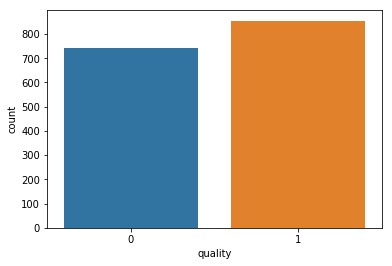

In [3]:
wine = pd.read_csv('datasets/wine-quality/winequality-red.csv', sep=';')
# Preprocess the data
bins = (2, 5.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names)
wine['quality'].unique()

label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

# separate the dataset as response variable and feature variables
wineX = wine.drop('quality', axis=1)
winey = wine['quality']
wine_labels = ['bad wine', 'good wine']

# look at distribution
wine_null = calculate_null_accuracy(winey)
print("Null Accuracy: %.2f %%" % (wine_null*100))

sns.countplot(wine['quality'])

## Digits

Null Accuracy: 10.18 %


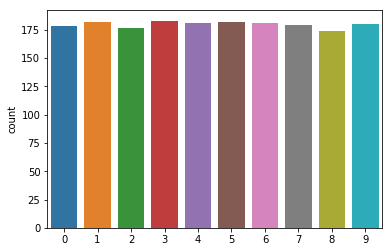

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

digitsX = digits.data
digitsy = digits.target
digits_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# look at distribution
digits_null = calculate_null_accuracy(digitsy)
print("Null Accuracy: %.2f %%" % (digits_null*100))

sns.countplot(digitsy)

## Test & Training Sets

In [5]:
'''
X = wineX
y = winey
labels = wine_labels
'''
X = digitsX
y = digitsy
labels = digits_labels
data = scale(X)

testSize = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=0)

numSamples, numFeatures = X.shape
numClusters = len(np.unique(y))
print("Number of samples: %d\nNumber of features: %d\nClusters: %d" %(numSamples, numFeatures, numClusters))


Number of samples: 1797
Number of features: 64
Clusters: 10


## Report Notes
Reading in data and scaling all feature values. 

### Wine
- Samples = 1599
- Features = 11
- Null Accuracy = 53.47%

### Digits
- Samples = 1797
- Features = 64
- Null Accuray = 10.18%

# Cluster
Choose your own measure of distance similarity

distance used: defaulting to euclidean, EXPLAIN

## Helper Functions



In [6]:
# kmeans plot showing elbow method and silhouette score
def kmeans_plot(dataName, data):
    sse = []
    scores = []
    for i in range(2,15):
        kmeans = KMeans(n_clusters=i,init='k-means++', random_state=0)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        
        kmeans_labels = kmeans.predict(data)
        scores.append(sil_score(data, kmeans_labels))
                
    # Plot the data
    title = "K-means of " + dataName
    plt.figure(figsize=(10, 8))
    plt.suptitle(title, y=1.05, fontsize=16)
    
    plt.subplot(211)
    plt.plot(range(2,15),sse, 'x-')
    plt.title("Sum of Squares vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum Square Error')
    plt.grid()
    
    plt.subplot(212)
    plt.plot(range(2,15),scores, 'x-')
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.grid()
    plt.show()
            
            
# expectation maximization plot showing bic and silhouette score
def em_plot(dataName, data):
    aic = []
    bic = []
    scores = []
    for i in range(2,15):
        gmm = GaussianMixture(n_components=i, random_state=0)
        gmm.fit(data)
        aic.append(gmm.aic(data))
        bic.append(gmm.bic(data))
        
        gmm_labels = gmm.predict(data)
        scores.append(sil_score(data, gmm_labels))
                
    # Plot the data
    title = "Expectation Maximization of " + dataName
    plt.figure(figsize=(10, 8))
    plt.suptitle(title, y=1.05, fontsize=16)
    
    plt.subplot(311)
    plt.plot(range(2,15), aic, 'x-')
    plt.title("AIC Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('AIC')
    plt.grid()
    
    plt.subplot(312)
    plt.plot(range(2,15), bic, 'x-')
    plt.title("BIC Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('BIC')
    plt.grid()
    
    plt.subplot(313)
    plt.plot(range(2,15),scores, 'x-')
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.grid()
    plt.show()

#kmeans_plot('Wine Quality', wineX)
#em_plot('Wine Quality', wineX)

## K-means
How did you choose k?
- Kmeans
    - Inertia: 
        - "is defined as the mean squared distance between each instance and its closest centroid. Logically, as per the definition lower the inertia better the model". 
        - "Sum of squared distances of samples to their closest cluster center" as defined by scikit learn
    - Silhouette Score: 
    
        Silhouette Coefficient = (x-y)/ max(x,y)
    
        where, y is the mean intra cluster distance: mean distance to the other instances in the same cluster. x depicts mean nearest cluster distance i.e. mean distance to the instances of the next closest cluster. The coefficient varies between -1 and 1. A value close to 1 implies that the instance is close to its cluster is a part of the right cluster. Whereas, a value close to -1 means that the value is assigned to the wrong cluster.

    https://medium.com/@jyotiyadav99111/selecting-optimal-number-of-clusters-in-kmeans-algorithm-silhouette-score-c0d9ebb11308
    
- Expectation Maximization
    - AIC - Akaike information criterion - the lower the better
        The Akaike information criterion (AIC) is an estimator of out-of-sample prediction error and thereby relative quality of statistical models for a given set of data.[1][2] Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.
        
        AIC is founded on information theory. When a statistical model is used to represent the process that generated the data, the representation will almost never be exact; so some information will be lost by using the model to represent the process. AIC estimates the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model.
        
        In estimating the amount of information lost by a model, AIC deals with the trade-off between the goodness of fit of the model and the simplicity of the model. In other words, AIC deals with both the risk of overfitting and the risk of underfitting.
        
        - Wikipedia
        
    - BIC - Bayesian information criterion - the lower the better
    
        In statistics, the Bayesian information criterion (BIC) or Schwarz information criterion (also SIC, SBC, SBIC) is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).
        
        When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. Both BIC and AIC attempt to resolve this problem by introducing a penalty term for the number of parameters in the model; the penalty term is larger in BIC than in AIC.
        
        - Wikipedia

### Wine

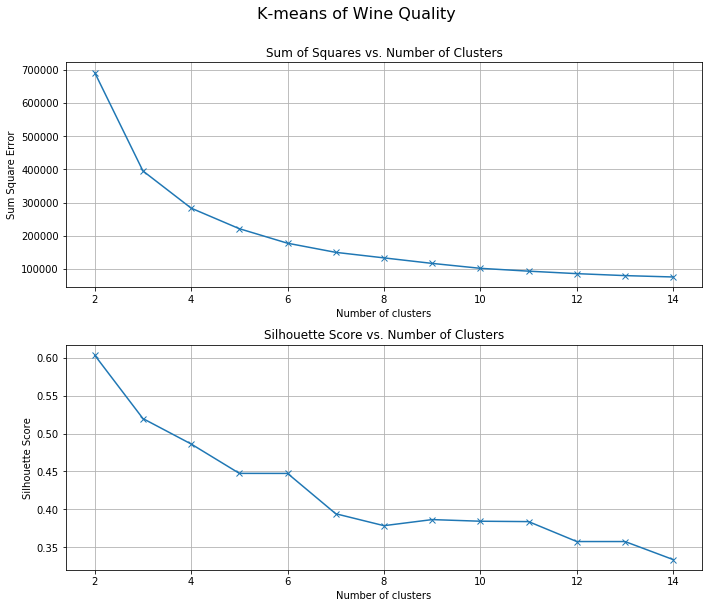

In [7]:
kmeans_plot('Wine Quality', wineX)

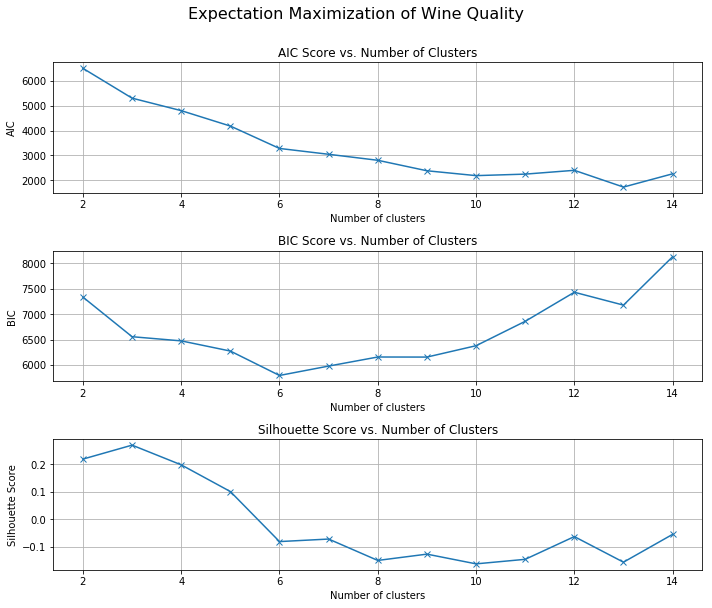

In [8]:
em_plot('Wine Quality', wineX)

### Digits

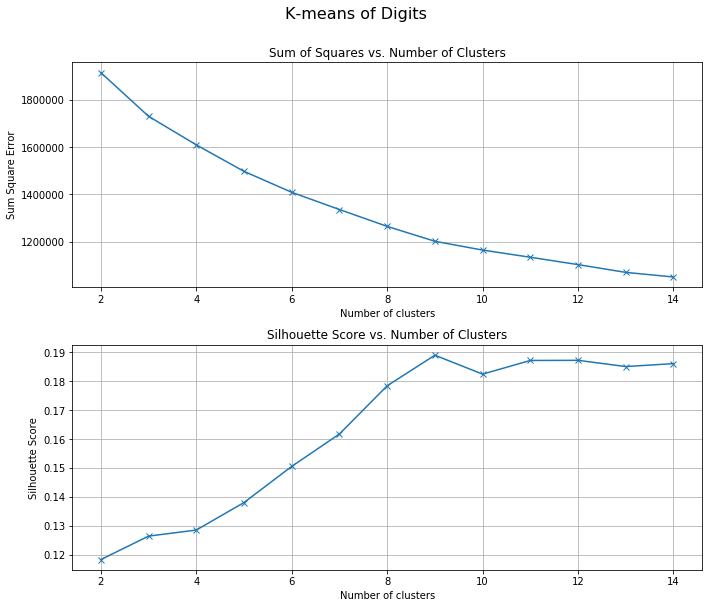

In [9]:
kmeans_plot('Digits', digitsX)

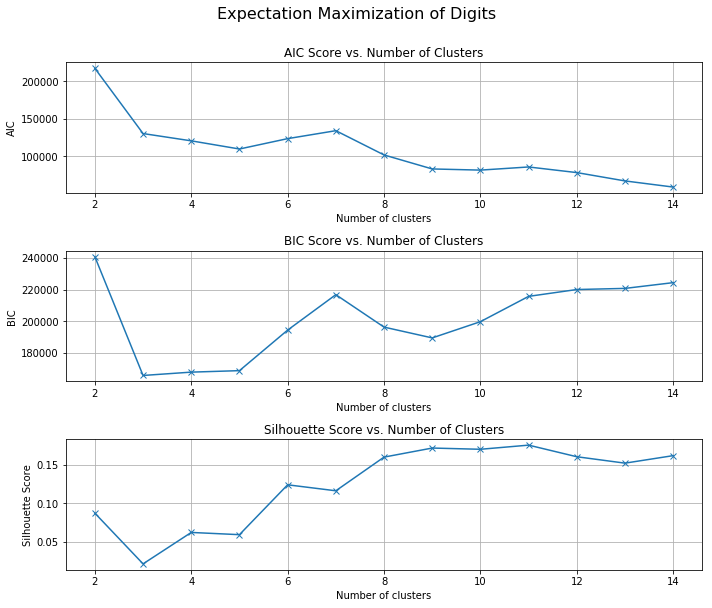

In [10]:
em_plot('Digits', digitsX)

## Report Notes
### k-means
Elbow Method
"We can find the optimum value for K using an Elbow point graph. We randomly initialise the K-Means algorithm for a range of K values and will plot it against the WCSS for each K value." The optimal value for k is then chosen based on where the "elbow" in the chart is, where the WCSS value may continue decreasing, but not at any quick rate.


#### Wine
- Clusters = 2
- Elbow Method at k=3 or 4
- Silhouette Score at 2

#### Digits
- Clusters = 10
- Elbow 9 or 10
- Score at 9


### Expectation Maximization

#### Wine
- Low AIC > 8
- Low BIC around 6
- Score the best around 2 or 3

#### Digits
- Low AIC between 8 to 14
- Low BIC trough between 3 and 5, and again at 8-10
- Best score around 9-11


# Dimensionality Reduction

## Helper Function

In [78]:
# Dimensionality reduction imports
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection as RP
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.linalg import pinv
from scipy.stats import kurtosis
from scipy import sparse 


# borrowed from https://github.com/JonathanTay/CS-7641-assignment-3/
def reconstruction_error(algo, data):
    W = algo.components_
    if sparse.issparse(W):
        W = W.todense()
    p = pinv(W)
    reconstructed = ((p @ W) @ (data.T)).T
    errors = np.square(data - reconstructed)
    return np.nanmean(errors)

#
# PCA
#

def calc_pca_components(data, dataName):
    t0 = time()
    
    pca = PCA(n_components=data.shape[1], random_state=0)
    pca.fit(data)
    var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
    
    end = time() - t0
    
    plt.title('PCA Analysis for %s' % dataName)
    plt.ylabel('Cumulative % Variance')
    plt.xlabel('Number of Features')
    plt.axhline(y=95, color='gray', linestyle='--', label='95% Variance')
    plt.plot(range(1,data.shape[1]+1), var)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    numComponents = np.argmax(var>95) + 1
    
    
    print('%s total features: %d' %(dataName, data.shape[1]))
    print('Best Number of PCA Components: %d' % numComponents)
    print('Total Time: %.3f seconds' % end)
    
    
#
# ICA
#
def calc_ica_components(data, dataName):
    t0 = time()
    
    dimensions = data.shape[1]+1
    kurtosis = []
    for dim in range(2,dimensions):
        ica = FastICA(n_components=dim, max_iter=600, random_state=0)
        res = ica.fit_transform(data)
        tmp = pd.DataFrame(res)
        k   = tmp.kurt(axis=0)
        kurtosis.append(k.abs().mean())
        
    end = time() - t0
    
    optimalComponents = np.argmax(kurtosis)
    
    plt.title('ICA Analysis for %s' % dataName)
    plt.ylabel('Kurtosis')
    plt.xlabel('Number of Features')
    plt.plot(range(2,dimensions), kurtosis)
    plt.grid()
    plt.show()
    
    print('Total Number of Features:', data.shape[1])
    print('Best Number of ICA Components:', optimalComponents+2)
    print('Total Time: %.3f seconds' % end)
    
    return optimalComponents
    
#
# RP
#
def calc_rp_components(data, dataName, tries=100):
    t0 = time()
    
    dimensions = data.shape[1]+1
    kurtosis = []
    stddev_kurtosis = []
    lowerbound = []
    upperbound = []
    for dim in range(2,dimensions):
        kurts = []
        for t in range(tries):
            rp = RP(n_components=dim)
            res = rp.fit_transform(data)
            tmp = pd.DataFrame(res)
            k   = tmp.kurt(axis=0)
            kurts.append(k.abs().mean())
        kurtosis.append(np.mean(kurts))
        lowerbound.append(np.mean(kurts)-np.std(kurts))
        upperbound.append(np.mean(kurts)+np.std(kurts))
        
    optimalComponents = np.argmax(kurtosis)
    
    end = time() - t0
    
    plt.title('RP Analysis for %s: %d Iterations' % (dataName, tries))
    plt.ylabel('Kurtosis')
    plt.xlabel('Number of Features')
    plt.plot(range(2,dimensions), kurtosis)
    plt.fill_between(range(2, dimensions), lowerbound, upperbound, facecolor='gray', alpha=0.1)
    plt.grid()
    plt.show()
    
    print('Total Number of Features:', data.shape[1])
    print('Best Number of RP Components:', optimalComponents+2)
    print('Total Time: %.3f seconds' % end)
    
    return optimalComponents
    
#
# UFS
#
# function based on https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py
def calc_kbest(dataX, datay, dataName):
    t0 = time()
    
    kBest = SelectKBest(f_classif, k=4)
    kBest.fit(dataX, datay)
    scores = kBest.pvalues_
    scores[np.isnan(scores)]=0 # get rid of NaN's
    scores += 1e-308           # get rid of zero values
    scores = -np.log10(scores)
    scores /= scores.max()
    
    plt.title('UFS Analysis for %s' % dataName)
    plt.ylabel('Normalized Univariate Score')
    plt.xlabel('Feature Number')
    plt.bar(np.arange(dataX.shape[-1]),scores)
    plt.grid(alpha=0.3)
    plt.show()

    end = time() - t0
    print('Total Time: %.3f seconds' % end)


#calc_pca_components(wineX_scaled, 'Wine Quality')
#calc_ica_components(wineX_scaled, 'Wine Quality')
#calc_rp_components(wineX_scaled, 'Wine Quality')
#calc_kbest(wineX_scaled, winey, 'Wine Quality')


#calc_pca_components(digitsX_scaled, 'Digits')
#calc_ica_components(digitsX_scaled, 'Digits')
#calc_rp_components(digitsX_scaled, 'Digits')
#calc_kbest(digitsX_scaled, digitsy, 'Digits')

## Wine

### PCA
- What is the distribution of eigenvalues?
    - Cumulative sum of variance was used to decide the best number of features. The cap was set at 95% variance of the dataset, after which implementing additional features could be thought of as having marginal return
- Assuming you only generate k projections (i.e. you do dimensionality reduction, how well is the data reconstructed?

### ICA
- How kurtotic are the distributions
    - More kurtotic, the better, so we find the max kurtosis from 1->num features. Large positive kurtosis means a "point" distribution, or a "supergaussian"
    - "Maximizing independence between components is closely related to maximizing their non-Gaussianity (again, see Hyvarinen and Oja). In principle, this can be achieved by maximizing the absolute or squared kurtosis, which is one way to measure non-Gaussianity. But, estimating kurtosis is highly sensitive to outliers, so this doesn't provide a good objective function for ICA in practice." - some person of stackexchange.com
- Do the projection axes seem "meaningful"?

### Randomized Projections
- Assuming you only generate k projections (i.e. you do dimensionality reduction) how well is the data reconstructed?
    - Data reconstruction was MUCH worse than PCA and ICA
- How much variation did you get when you re-ran several times?
    - A lot of variation. The number of components used averages out and the standard deviation of the kurtosis becomes smaller and smaller with an increase in iterations and number of components

### Univariate Feature Selection
- something

--------------------------------------------------------------------------------
*  Wine PCA  *
--------------------------------------------------------------------------------


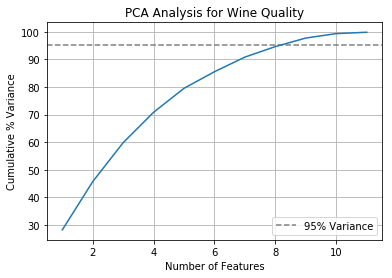

Wine Quality total features: 11
Best Number of PCA Components: 9
Total Time: 0.002 seconds
PCA Reconstruction Error:  5.296722553830842e-31
--------------------------------------------------------------------------------
*  Wine ICA  *
--------------------------------------------------------------------------------


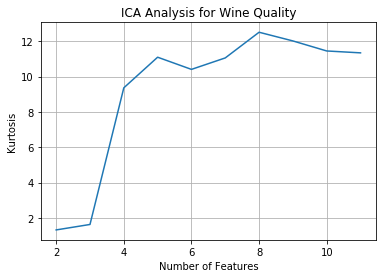

Total Number of Features: 11
Best Number of ICA Components: 8
Total Time: 0.068 seconds
ICA Reconstruction Error:  0.14475286492356385
--------------------------------------------------------------------------------
*  Wine RP  *
--------------------------------------------------------------------------------


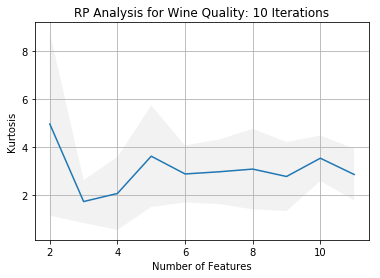

Total Number of Features: 11
Best Number of RP Components: 2
Total Time: 0.072 seconds


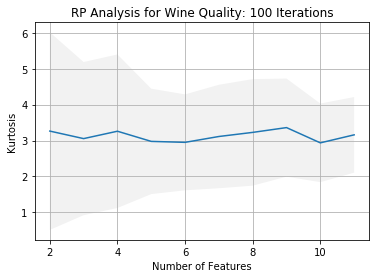

Total Number of Features: 11
Best Number of RP Components: 9
Total Time: 0.703 seconds
ICA Reconstruction Error:  0.31621939423973777
--------------------------------------------------------------------------------
*  Wine UFS  *
--------------------------------------------------------------------------------


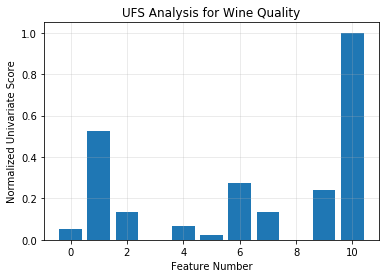

Total Time: 0.116 seconds


In [81]:
# scale the data
wineX_scaled = scale(wineX)

#
# PCA
#
print_line('Wine PCA')
wine_pca_components = calc_pca_components(wineX_scaled, 'Wine Quality')
winePCA = PCA(n_components=wine_pca_components, random_state=0).fit(wineX_scaled)
wine_pca_sse = reconstruction_error(winePCA, wineX_scaled)
print('PCA Reconstruction Error: ', wine_pca_sse)



#
# ICA
#
print_line('Wine ICA')
wine_ica_components = calc_ica_components(wineX_scaled, 'Wine Quality')
wineICA = FastICA(n_components=wine_ica_components, random_state=0).fit(wineX_scaled)
wine_ica_sse = reconstruction_error(wineICA, wineX_scaled)
print('ICA Reconstruction Error: ', wine_ica_sse)


#
# RP
#
print_line('Wine RP')
wine_rp_components = calc_rp_components(wineX_scaled, 'Wine Quality', 10)
wine_rp_components = calc_rp_components(wineX_scaled, 'Wine Quality', 100)
wineRP = RP(n_components=wine_rp_components, random_state=0).fit(wineX_scaled)
wine_rp_sse = reconstruction_error(wineRP, wineX_scaled)
print('ICA Reconstruction Error: ', wine_rp_sse)


#
# UFS
#
print_line('Wine UFS')
calc_kbest(wineX_scaled, winey, 'Wine Quality')

## Digits

### PCA
- What is the distribution of eigenvalues?
    - Cumulative sum of variance was used to decide the best number of features. The cap was set at 95% variance of the dataset, after which implementing additional features could be thought of as having marginal return
- Assuming you only generate k projections (i.e. you do dimensionality reduction, how well is the data reconstructed?

### ICA
- How kurtotic are the distributions
    - More kurtotic, the better, so we find the max kurtosis from 1->num features. Large positive kurtosis means a "point" distribution, or a "supergaussian"
    - "Maximizing independence between components is closely related to maximizing their non-Gaussianity (again, see Hyvarinen and Oja). In principle, this can be achieved by maximizing the absolute or squared kurtosis, which is one way to measure non-Gaussianity. But, estimating kurtosis is highly sensitive to outliers, so this doesn't provide a good objective function for ICA in practice." - some person of stackexchange.com
- Do the projection axes seem "meaningful"?

### Randomized Projections
- Assuming you only generate k projections (i.e. you do dimensionality reduction) how well is the data reconstructed?
    - Data reconstruction was MUCH worse than PCA and ICA
- How much variation did you get when you re-ran several times?
    - A lot of variation. The number of components used averages out and the standard deviation of the kurtosis becomes smaller and smaller with an increase in iterations and number of components

### Univariate Feature Selection
- something

--------------------------------------------------------------------------------
*  Digits PCA  *
--------------------------------------------------------------------------------


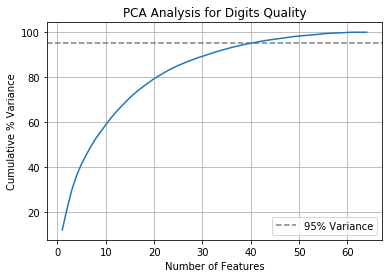

Digits Quality total features: 64
Best Number of PCA Components: 40
Total Time: 0.008 seconds
PCA Reconstruction Error:  2.566011023416891e-30
--------------------------------------------------------------------------------
*  Digits ICA  *
--------------------------------------------------------------------------------


/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: 

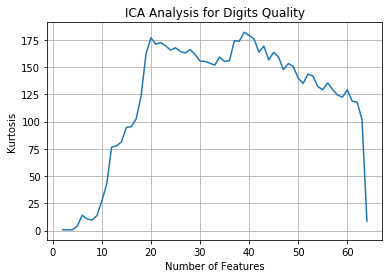

Total Number of Features: 64
Best Number of ICA Components: 39
Total Time: 10.538 seconds
ICA Reconstruction Error:  0.059863668637683824
--------------------------------------------------------------------------------
*  Digits RP  *
--------------------------------------------------------------------------------


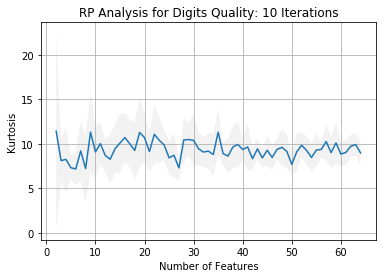

Total Number of Features: 64
Best Number of RP Components: 2
Total Time: 0.838 seconds


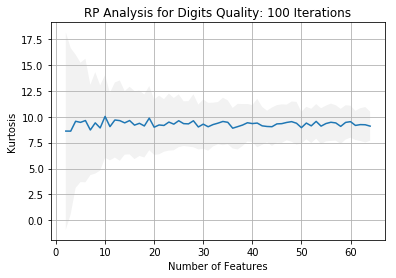

Total Number of Features: 64
Best Number of RP Components: 10
Total Time: 8.720 seconds
ICA Reconstruction Error:  0.8189781069337861
--------------------------------------------------------------------------------
*  Digits UFS  *
--------------------------------------------------------------------------------


/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 0 32 39] are constant.
  UserWarning)
/home/reed/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


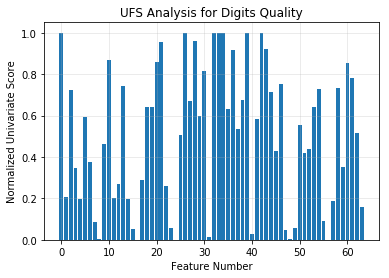

Total Time: 0.197 seconds


In [80]:
# scale the data
digitsX_scaled = scale(digitsX)

#
# PCA
#
print_line('Digits PCA')
digits_pca_components = calc_pca_components(digitsX_scaled, 'Digits Quality')
digitsPCA = PCA(n_components=digits_pca_components, random_state=0).fit(digitsX_scaled)
digits_pca_sse = reconstruction_error(digitsPCA, digitsX_scaled)
print('PCA Reconstruction Error: ', digits_pca_sse)



#
# ICA
#
print_line('Digits ICA')
digits_ica_components = calc_ica_components(digitsX_scaled, 'Digits Quality')
digitsICA = FastICA(n_components=digits_ica_components, random_state=0).fit(digitsX_scaled)
digits_ica_sse = reconstruction_error(digitsICA, digitsX_scaled)
print('ICA Reconstruction Error: ', digits_ica_sse)


#
# RP
#
print_line('Digits RP')
digits_rp_components = calc_rp_components(digitsX_scaled, 'Digits Quality', 10)
digits_rp_components = calc_rp_components(digitsX_scaled, 'Digits Quality', 100)
digitsRP = RP(n_components=digits_rp_components, random_state=0).fit(digitsX_scaled)
digits_rp_sse = reconstruction_error(digitsRP, digitsX_scaled)
print('ICA Reconstruction Error: ', digits_rp_sse)


#
# UFS
#
print_line('Digits UFS')
calc_kbest(digitsX_scaled, digitsy, 'Digits Quality')

# Clustering + Dimensionality Reduction
2 datasets, 4 dimensionality reductions, 2 algorithms (16 problems)

- Did you get the same clusters as before? Why or why not?

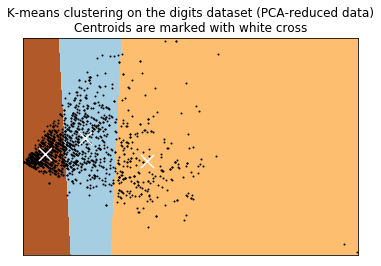

In [13]:
#
# THIS IS AN EXAMPLE OF PCA DA AND THEN USING KMEANS
# 
# code based on https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
reduced_data = PCA(n_components=2).fit_transform(wineX)
kmeans = KMeans(init='k-means++', n_clusters=3, random_state=0)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

###


In [14]:
# code based on example found at:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

sample_size = 300 # TODO -why this?

def bench_k_means(estimator, labels, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_, metric='euclidean', sample_size=sample_size)))
   

In [15]:
 
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')  
print(82 * '_')


bench_k_means(KMeans(init='k-means++', n_clusters=numClusters, n_init=10),
              labels = y, name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=numClusters, n_init=10),
              labels = y, name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=numClusters).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=numClusters, n_init=1),
              labels = y, name="PCA-based", data=data)

init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
__________________________________________________________________________________
k-means++	0.20s	69463	0.609	0.657	0.632	0.476	0.628	0.148
random   	0.15s	69464	0.609	0.657	0.632	0.478	0.628	0.147
PCA-based	0.03s	70804	0.671	0.698	0.684	0.561	0.681	0.130


## Report Notes
### Wine

### Digits

# NN with Dimensionality Reduction
Apply the dimensionality reduction algorithms to one of your datasets from assignment 1 (already done above (one wine set)) and rerun your neural network learner on the newly projected data.
- Any differences in performance?
- Any differences in speed?
- Any other differences?

## Report Notes
### Wine

### Digits

# NN with Dimensionality Reduction and Clustering Applied to Dataset
Apply the clustering algorithms to the same dataset to which you just applied the dimensionality reduction algorithms, treating the clusters as if they were new features. In other words, treat the clustering algorithms as if they were dimensionality reduction algorithms. 

Clustering -> neural network

Rerun your neural network learner on the newly projected data.
- Any differences in performance?
- Any differences in speed?
- Any other differences?

## Report Notes
### Wine

### Digits


# General Notes
- Explanation of your methods
- How are these algorithms the same as, different from, and interact with your earlier work
- Clusters
    - A description of the clusters that you got
    - Why did you get the clusters you did
    - Do they make “sense”? See isbell paper
    - If you used data that already had labels (For example data from a classification problem from assignment #1) did the clusters line up with the labels?
    - Do they otherwise line up naturally?
    - Why or why not?
    - Compare and contrast the different algorithms?
    - What sort of changes might you make to each of those algorithms to improve performance?
    - How much performance was due to the problems you chose?
    - Justify your analysis with data explicitly
- It might be difficult to generate the same kinds of graphs for the part of the assignment. Come up with some way to describe the kinds of clusters you get. If you can do it visually, all the better.


















































In [16]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

X_digits, y_digits = load_digits(return_X_y=True)
data = scale(X_digits)

n_samples, n_features = data.shape
n_digits = len(np.unique(y_digits))
labels = y_digits

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

print(labels)

n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.21s	69510	0.610	0.657	0.633	0.481	0.629	0.129
random   	0.20s	69907	0.633	0.674	0.653	0.518	0.649	0.131
PCA-based	0.03s	70768	0.668	0.695	0.681	0.558	0.678	0.142
__________________________________________________________________________________
[0 1 2 ... 8 9 8]
